In [2]:
import pandas as pd

df = pd.read_csv("loan.csv")
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=["gender", "occupation", "education_level", "marital_status"])

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[["age", "income", "credit_score"]])
scaled_df = pd.DataFrame(scaled_features, columns=["scaled_age", "scaled_income", "scaled_credit_score"])

# Combine scaled features with encoded data
df_final = pd.concat([df_encoded.drop(columns=["age", "income", "credit_score"]), scaled_df], axis=1)
X = df_final.drop("loan_status", axis=1)
y = df["loan_status"]

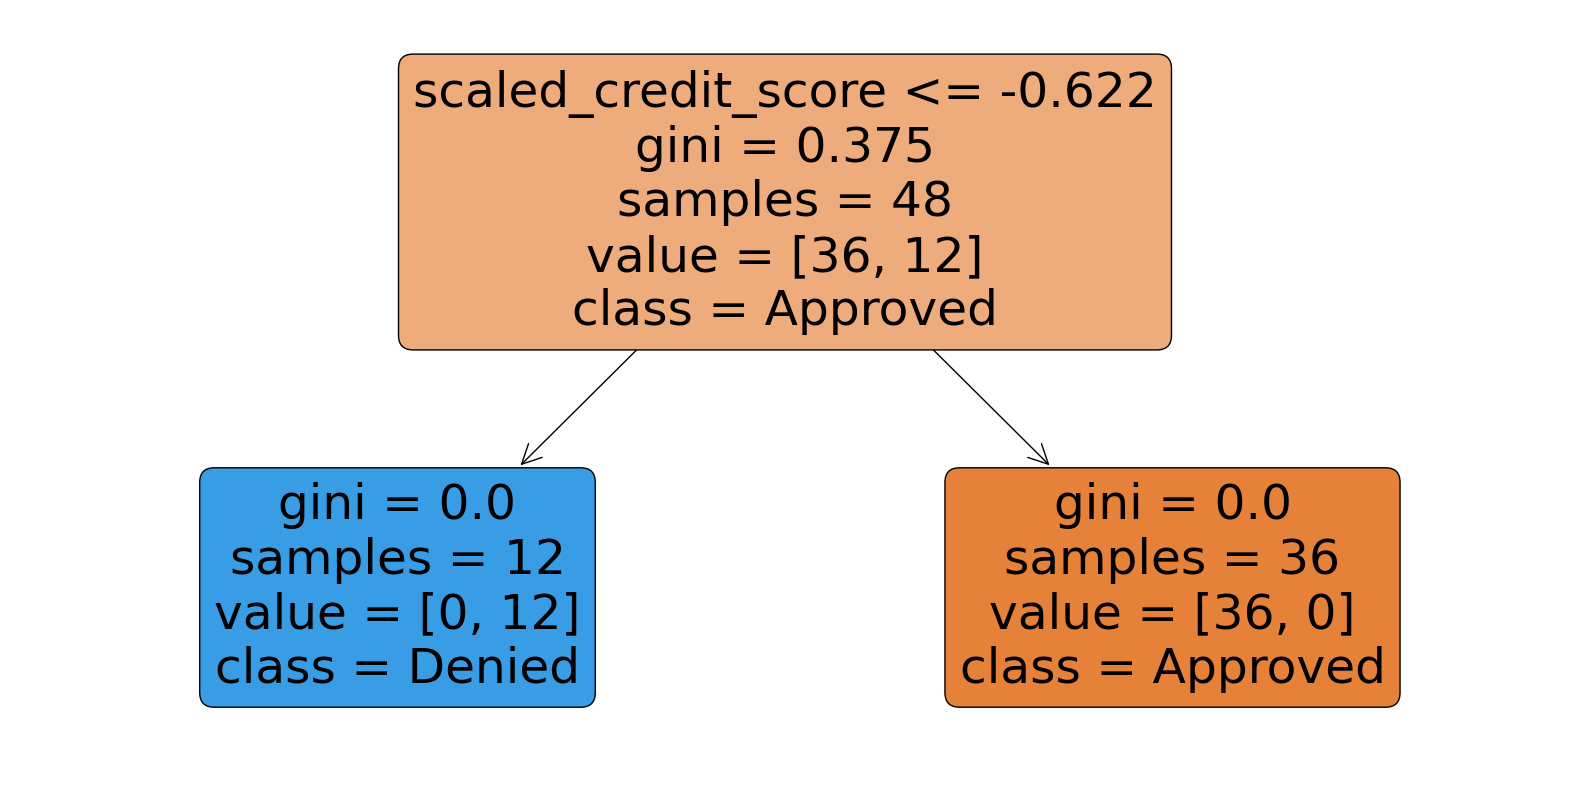

Feature Importances:
gender_Female: 0.0
gender_Male: 0.0
occupation_Accountant: 0.0
occupation_Analyst: 0.0
occupation_Architect: 0.0
occupation_Artist: 0.0
occupation_Banker: 0.0
occupation_Chef: 0.0
occupation_Consultant: 0.0
occupation_Dentist: 0.0
occupation_Designer: 0.0
occupation_Doctor: 0.0
occupation_Editor: 0.0
occupation_Electrician: 0.0
occupation_Engineer: 0.0
occupation_HR: 0.0
occupation_IT: 0.0
occupation_Lawyer: 0.0
occupation_Manager: 0.0
occupation_Marketing: 0.0
occupation_Musician: 0.0
occupation_Nurse: 0.0
occupation_Pharmacist: 0.0
occupation_Photographer: 0.0
occupation_Pilot: 0.0
occupation_Professor: 0.0
occupation_Programmer: 0.0
occupation_Psychologist: 0.0
occupation_Realtor: 0.0
occupation_Receptionist: 0.0
occupation_Researcher: 0.0
occupation_Sales: 0.0
occupation_Salesman: 0.0
occupation_Server: 0.0
occupation_Software: 0.0
occupation_Student: 0.0
occupation_Stylist: 0.0
occupation_Teacher: 0.0
occupation_Veterinarian: 0.0
occupation_Writer: 0.0
educati

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
clf = DecisionTreeClassifier(criterion="gini", random_state=42)
clf.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, rounded=True, filled=True)
plt.show()

# Feature importance
feature_importance = clf.feature_importances_
print("Feature Importances:")
for i, importance in enumerate(feature_importance):
    print(f"{X.columns[i]}: {importance}")


In [5]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions
y_pred = clf.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Confusion Matrix:
 [[8 1]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

    Approved       1.00      0.89      0.94         9
      Denied       0.80      1.00      0.89         4

    accuracy                           0.92        13
   macro avg       0.90      0.94      0.92        13
weighted avg       0.94      0.92      0.93        13



In [6]:
import math

def calculate_gini_index(df, feature, target):
    gini_index = 0
    for value in df[feature].unique():
        subset = df[df[feature] == value]
        proportion = len(subset) / len(df)
        outcomes_count = subset[target].value_counts()
        p_approved = outcomes_count.get("Approved", 0) / len(subset)
        p_denied = outcomes_count.get("Denied", 0) / len(subset)
        gini = 1 - (p_approved**2) - (p_denied**2)
        gini_index += proportion * gini
    return gini_index

def calculate_entropy(df, feature, target):
    entropy = 0
    for value in df[feature].unique():
        subset = df[df[feature] == value]
        proportion = len(subset) / len(df)
        for outcome in subset[target].unique():
            p = len(subset[subset[target] == outcome]) / len(subset)
            if p > 0:
                entropy -= proportion * p * math.log2(p)
    return entropy

# Calculate Gini Index and Entropy
gini_gender = calculate_gini_index(df, "gender", "loan_status")
entropy_gender = calculate_entropy(df, "gender", "loan_status")

print("Gini Index for gender:", gini_gender)
print("Entropy for gender:", entropy_gender)


Gini Index for gender: 0.36590869028732587
Entropy for gender: 0.7901862259623784


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

    Approved       1.00      0.89      0.94         9
      Denied       0.80      1.00      0.89         4

    accuracy                           0.92        13
   macro avg       0.90      0.94      0.92        13
weighted avg       0.94      0.92      0.93        13



In [9]:
# Prediction
y_pred = clf.predict(X_test)

# Combine predicted and actual values into a DataFrame
results = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test.values
})

# Add a column to indicate if the prediction is correct
results['Match'] = results['Predicted'] == results['Actual']

# Display results
print("Prediction Results:")
print(results)

# Display summary of correct and incorrect predictions
correct_predictions = results['Match'].sum()
total_predictions = len(results)
accuracy = correct_predictions / total_predictions

print("\nSummary:")
print(f"Total Predictions: {total_predictions}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Accuracy: {accuracy:.2%}")

Prediction Results:
   Predicted    Actual  Match
0   Approved  Approved   True
1     Denied    Denied   True
2   Approved  Approved   True
3   Approved  Approved   True
4   Approved  Approved   True
5   Approved  Approved   True
6     Denied    Denied   True
7     Denied    Denied   True
8     Denied    Denied   True
9   Approved  Approved   True
10  Approved  Approved   True
11    Denied  Approved  False
12  Approved  Approved   True

Summary:
Total Predictions: 13
Correct Predictions: 12
Accuracy: 92.31%
